# Trabajo en Clase: Resolución de Árboles de Expresión Aritmética


Este trabajo tiene como objetivo aplicar los conocimientos sobre árboles binarios de expresión en Python, utilizando clases, recursividad y visualización con `networkx` y `matplotlib`.

## Instrucciones Generales:
1. Resuelve los **5 ejercicios** propuestos a continuación.
2. Para cada ejercicio:
   - Construye el árbol binario de expresión.
   - Implementa el árbol con clases (`Nodo`, `evaluar()`...).
   - Visualiza el árbol con `networkx`.
   - Evalúa la expresión y muestra el resultado.
3. Documenta y comenta tu código.


In [219]:
print("""
#############################
#      Programacion IV      #
#       Esteban Ruiz        #
#      Cuarto Semestre      #
#         16/10/2025        #
#############################
""")


#############################
#      Programacion IV      #
#       Esteban Ruiz        #
#      Cuarto Semestre      #
#         16/10/2025        #
#############################



## Ejercicio 1
**Expresión a resolver:** `(7 + 2) * (5 - 3)`

### a. Construcción del Árbol

In [205]:
# Clase Nodo para representar cada elemento del árbol
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izq = None
        self.der = None

# Función para construir el árbol de la expresión
def construir_arbol():
    raiz = Nodo('*')
    raiz.izq = Nodo('+')
    raiz.der = Nodo('-')

    raiz.izq.izq = Nodo(7)
    raiz.izq.der = Nodo(2)
    raiz.der.izq = Nodo(5)
    raiz.der.der = Nodo(3)

    return raiz

# Construimos el árbol
arbol = construir_arbol()

### b. Visualización con `networkx`

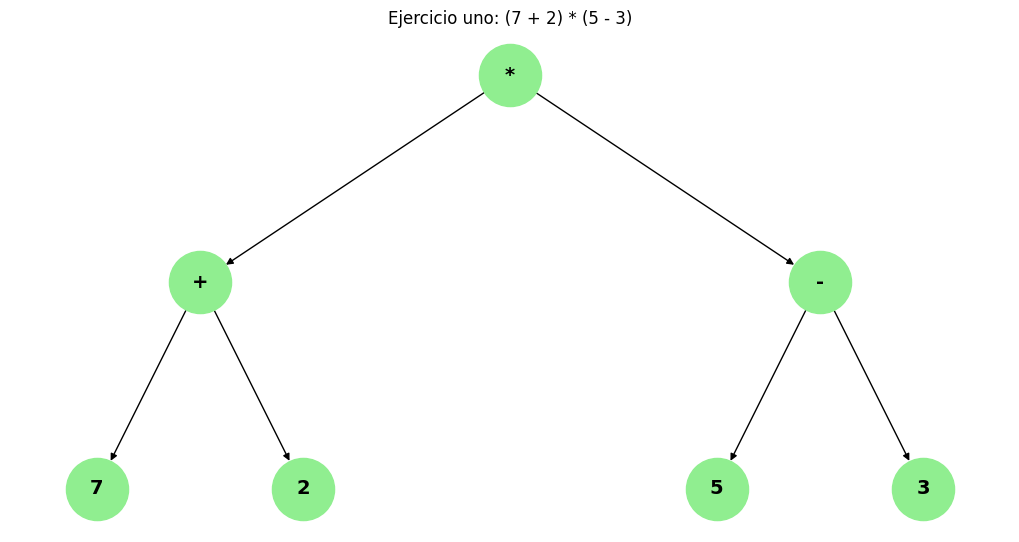

In [206]:
import matplotlib.pyplot as plt
import networkx as nx

# Creamos un nuevo grafo dirigido
G = nx.DiGraph()

# Definimos las conexiones entre nodos
edges = [
    ('*', '+'),
    ('*', '-'),
    ('+', '7'),
    ('+', '2'),
    ('-', '5'),
    ('-', '3')
]

# Agregamos las aristas al grafo
G.add_edges_from(edges)

# Definimos posiciones para visualizar el árbol de forma jerárquica
pos = {
    '*': (0, 2),
    '+': (-1.5, 1),
    '-': (1.5, 1),
    '7': (-2, 0),
    '2': (-1, 0),
    '5': (1, 0),
    '3': (2, 0)
}

# Dibujamos el árbol
plt.figure(figsize=(10, 5))
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=2000,
    font_size=14,
    font_weight='bold',
    arrows=True
)
plt.title("Ejercicio uno: (7 + 2) * (5 - 3)")
plt.axis('off')
plt.show()

### c. Evaluación de la Expresión

In [207]:
# Función recursiva para evaluar el árbol
def evaluar(nodo):
    if isinstance(nodo.valor, int):
        return nodo.valor

    izq = evaluar(nodo.izq)
    der = evaluar(nodo.der)

    if nodo.valor == '+':
        return izq + der
    elif nodo.valor == '-':
        return izq - der
    elif nodo.valor == '*':
        return izq * der
    elif nodo.valor == '/':
        return izq / der

# Evaluamos la expresión
resultado = evaluar(arbol)
resultado

18

## Ejercicio 2
**Expresión a resolver:** `((6 / 2) + (1 + 1)) * (4 - 2)`

### a. Construcción del Árbol

In [208]:
# Clase Nodo para representar cada elemento del árbol
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izq = None
        self.der = None

# Función para construir el árbol de la expresión
def construir_arbol():
    raiz = Nodo('*')
    raiz.izq = Nodo('+')   # Subárbol izquierdo
    raiz.der = Nodo('-')   # Subárbol derecho

    # Subárbol izquierdo del '+'
    raiz.izq.izq = Nodo('/')     # (6 / 2)
    raiz.izq.der = Nodo('+')     # (1 + 1)

    # Nodos para (6 / 2)
    raiz.izq.izq.izq = Nodo(6)
    raiz.izq.izq.der = Nodo(2)

    # Nodos para (1 + 1)
    raiz.izq.der.izq = Nodo(1)
    raiz.izq.der.der = Nodo(1)

    # Nodos para (4 - 2)
    raiz.der.izq = Nodo(4)
    raiz.der.der = Nodo(2)

    return raiz

# Construimos el árbol
arbol = construir_arbol()

### b. Visualización con `networkx`

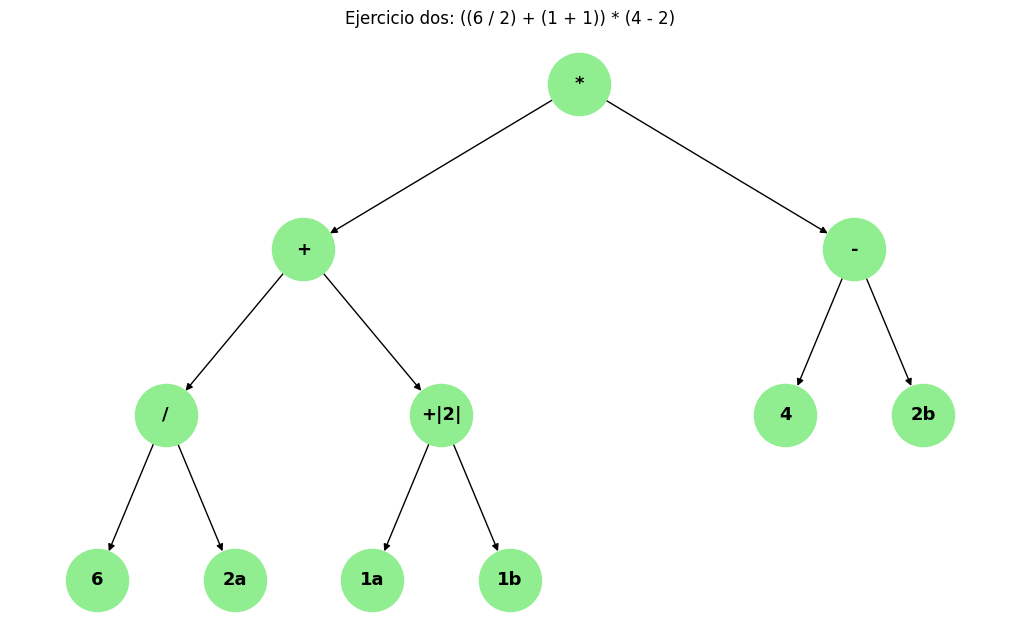

In [209]:
import matplotlib.pyplot as plt
import networkx as nx

# Creamos un nuevo grafo dirigido
G = nx.DiGraph()

# Definimos las conexiones entre nodos
edges = [
    ('*', '+'),
    ('*', '-'),
    ('+', '/'),
    ('+', '+|2|'),
    ('/', '6'),
    ('/', '2a'),
    ('+|2|', '1a'),
    ('+|2|', '1b'),
    ('-', '4'),
    ('-', '2b')
]

# Agregamos las aristas al grafo
G.add_edges_from(edges)

# Definimos posiciones para visualizar el árbol de forma jerárquica
pos = {
    '*': (0, 3),
    '+': (-2, 2),
    '-': (2, 2),
    '/': (-3, 1),
    '+|2|': (-1, 1),
    '6': (-3.5, 0),
    '2a': (-2.5, 0),
    '1a': (-1.5, 0),
    '1b': (-0.5, 0),
    '4': (1.5, 1),
    '2b': (2.5, 1)
}

# Dibujamos el árbol
plt.figure(figsize=(10, 6))
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=2000,
    font_size=13,
    font_weight='bold',
    arrows=True
)
plt.title("Ejercicio dos: ((6 / 2) + (1 + 1)) * (4 - 2)")
plt.axis('off')
plt.show()

### c. Evaluación de la Expresión

In [210]:
# Función recursiva para evaluar el árbol
def evaluar(nodo):
    if isinstance(nodo.valor, int):
        return nodo.valor

    izq = evaluar(nodo.izq)
    der = evaluar(nodo.der)

    if nodo.valor == '+':
        return izq + der
    elif nodo.valor == '-':
        return izq - der
    elif nodo.valor == '*':
        return izq * der
    elif nodo.valor == '/':
        return izq / der

# Evaluamos la expresión
resultado = evaluar(arbol)
resultado

10.0

## Ejercicio 3
**Expresión a resolver:** `9 - ((3 * 2) + (8 / 4))`

### a. Construcción del Árbol

In [211]:
# Clase Nodo para representar cada elemento del árbol
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izq = None
        self.der = None

# Función para construir el árbol de la expresión
def construir_arbol():
    raiz = Nodo('-')             # Raíz principal
    raiz.izq = Nodo(9)           # Lado izquierdo
    raiz.der = Nodo('+')         # Lado derecho

    # Subárbol izquierdo
    raiz.der.izq = Nodo('*')
    raiz.der.izq.izq = Nodo(3)
    raiz.der.izq.der = Nodo(2)

    # Subárbol derecho
    raiz.der.der = Nodo('/')
    raiz.der.der.izq = Nodo(8)
    raiz.der.der.der = Nodo(4)

    return raiz

# Construimos el árbol
arbol = construir_arbol()

### b. Visualización con `networkx`

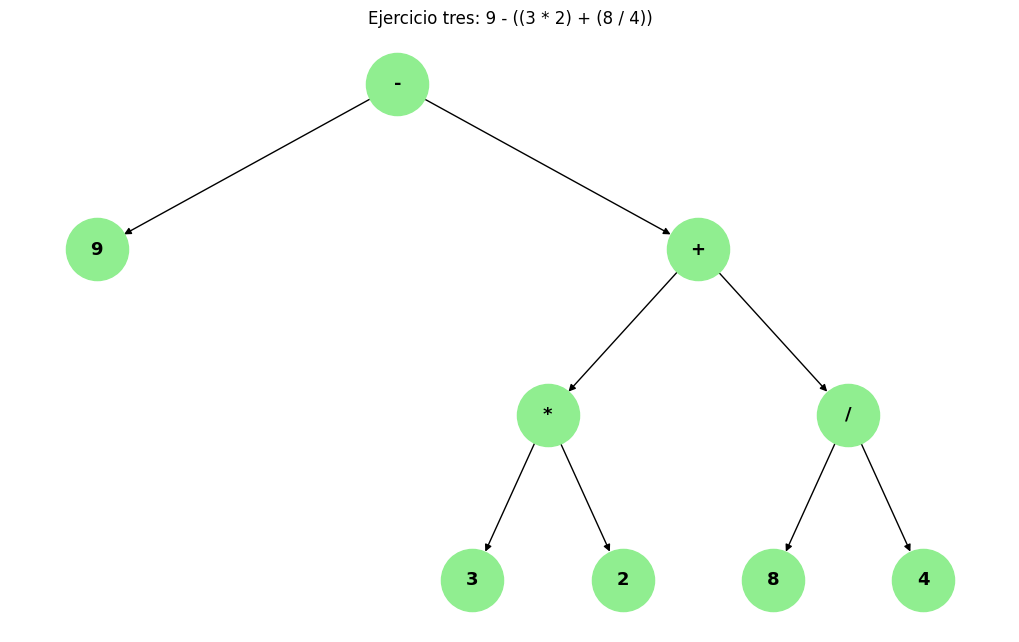

In [212]:
import matplotlib.pyplot as plt
import networkx as nx

# Creamos el grafo dirigido
G = nx.DiGraph()

# Definimos las conexiones entre nodos
edges = [
    ('-', '9'),
    ('-', '+'),
    ('+', '*'),
    ('+', '/'),
    ('*', '3'),
    ('*', '2'),
    ('/', '8'),
    ('/', '4')
]

# Agregamos las aristas
G.add_edges_from(edges)

# Definimos posiciones para visualizar el árbol de forma jerárquica
pos = {
    '-': (0, 3),
    '9': (-2, 2),
    '+': (2, 2),
    '*': (1, 1),
    '/': (3, 1),
    '3': (0.5, 0),
    '2': (1.5, 0),
    '8': (2.5, 0),
    '4': (3.5, 0)
}

# Dibujamos el árbol
plt.figure(figsize=(10, 6))
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=2000,
    font_size=13,
    font_weight='bold',
    arrows=True
)
plt.title("Ejercicio tres: 9 - ((3 * 2) + (8 / 4))")
plt.axis('off')
plt.show()

### c. Evaluación de la Expresión

In [213]:
# Función recursiva para evaluar el árbol
def evaluar(nodo):
    if isinstance(nodo.valor, int):
        return nodo.valor

    izq = evaluar(nodo.izq)
    der = evaluar(nodo.der)

    if nodo.valor == '+':
        return izq + der
    elif nodo.valor == '-':
        return izq - der
    elif nodo.valor == '*':
        return izq * der
    elif nodo.valor == '/':
        return izq / der

# Evaluamos la expresión
resultado = evaluar(arbol)
resultado

1.0

## Ejercicio 4
**Expresión a resolver:** `((10 - 2) * (6 + 1)) / (8 - (3 + 1))`

### a. Construcción del Árbol

In [214]:
# Clase Nodo para representar cada elemento del árbol
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izq = None
        self.der = None

# Función para construir el árbol de la expresión
def construir_arbol():
    raiz = Nodo('/')                 # Raíz principal
    raiz.izq = Nodo('*')             # Lado izquierdo
    raiz.der = Nodo('-')             # Lado derecho

    # Subárbol izquierdo del '*'
    raiz.izq.izq = Nodo('-')         # (10 - 2)
    raiz.izq.der = Nodo('+')         # (6 + 1)

    # Nodos del subárbol (10 - 2)
    raiz.izq.izq.izq = Nodo(10)
    raiz.izq.izq.der = Nodo(2)

    # Nodos del subárbol (6 + 1)
    raiz.izq.der.izq = Nodo(6)
    raiz.izq.der.der = Nodo(1)

    # Subárbol derecho del '/'
    raiz.der.izq = Nodo(8)           # 8
    raiz.der.der = Nodo('+2')        # (3 + 1)

    # Nodos para (3 + 1)
    raiz.der.der.izq = Nodo(3)
    raiz.der.der.der = Nodo(1)

    return raiz

# Construimos el árbol
arbol = construir_arbol()

### b. Visualización con `networkx`

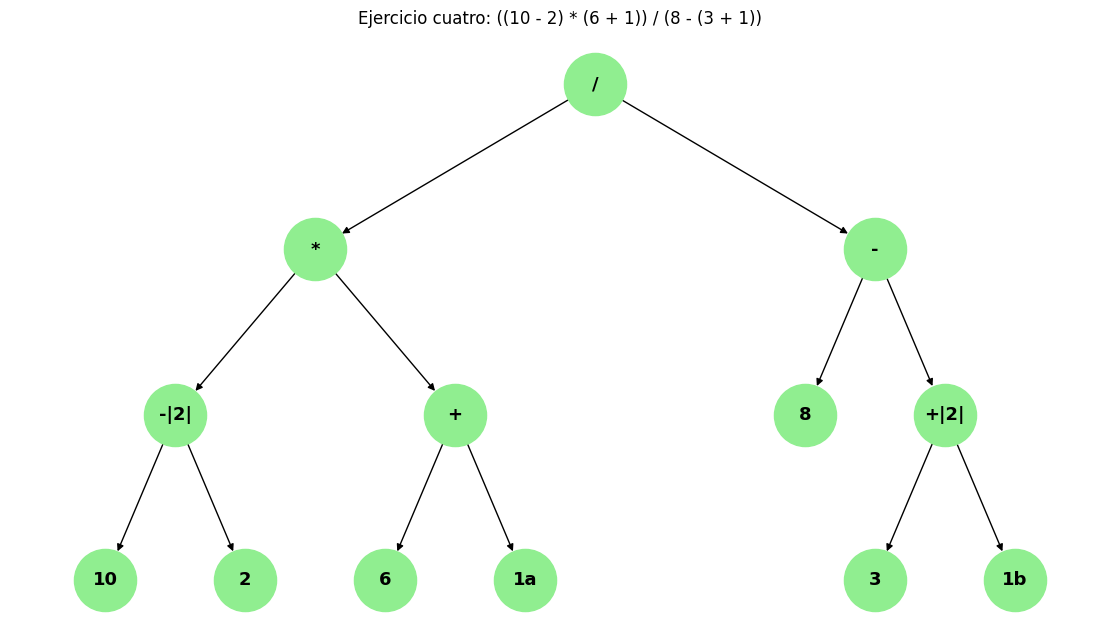

In [215]:
import matplotlib.pyplot as plt
import networkx as nx

# Creamos un nuevo grafo dirigido
G = nx.DiGraph()

edges = [
    ('/', '*'),
    ('/', '-'),
    ('*', '-|2|'),
    ('*', '+'),
    ('-|2|', '10'),
    ('-|2|', '2'),
    ('+', '6'),
    ('+', '1a'),
    ('-', '8'),
    ('-', '+|2|'),
    ('+|2|', '3'),
    ('+|2|', '1b')
]

# Agregamos las aristas
G.add_edges_from(edges)

# Definimos posiciones para visualizar el árbol de forma jerárquica
pos = {
    '/': (0, 3),
    '*': (-2, 2),
    '-': (2, 2),
    '-|2|': (-3, 1),
    '+': (-1, 1),
    '10': (-3.5, 0),
    '2': (-2.5, 0),
    '6': (-1.5, 0),
    '1a': (-0.5, 0),
    '8': (1.5, 1),
    '+|2|': (2.5, 1),
    '3': (2, 0),
    '1b': (3, 0)
}

# Dibujamos el árbol
plt.figure(figsize=(11, 6))
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=2000,
    font_size=13,
    font_weight='bold',
    arrows=True
)
plt.title("Ejercicio cuatro: ((10 - 2) * (6 + 1)) / (8 - (3 + 1))")
plt.axis('off')
plt.show()

### c. Evaluación de la Expresión

In [216]:
# Función recursiva para evaluar el árbol
def evaluar(nodo):
    if isinstance(nodo.valor, int):
        return nodo.valor

    # Si el valor del nodo es una cadena que incluye número (como "+2"), tomar solo el operador
    operador = str(nodo.valor)[0]

    izq = evaluar(nodo.izq)
    der = evaluar(nodo.der)

    if operador == '+':
        return izq + der
    elif operador == '-':
        return izq - der
    elif operador == '*':
        return izq * der
    elif operador == '/':
        return izq / der

# Evaluamos la expresión
resultado = evaluar(arbol)
resultado

14.0

## Ejercicio 5
**Expresión a resolver:** `(5 + (2 * (8 - 3))) / (6 - (1 + 2))`

### a. Construcción del Árbol

In [217]:
# Clase Nodo (misma estructura que ejercicios anteriores)
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izq = None
        self.der = None

# Función para construir el árbol de la expresión
def construir_arbol():
    raiz = Nodo('/')                  # Raíz principal
    raiz.izq = Nodo('+')              # Lado izquierdo
    raiz.der = Nodo('-')              # Lado derecho

    # Subárbol izquierdo del '+'
    raiz.izq.izq = Nodo(5)
    raiz.izq.der = Nodo('*')

    # Subárbol del '*'
    raiz.izq.der.izq = Nodo(2)
    raiz.izq.der.der = Nodo('-2')     # (8 - 3)
    raiz.izq.der.der.izq = Nodo(8)
    raiz.izq.der.der.der = Nodo(3)

    # Subárbol derecho del '/'
    raiz.der.izq = Nodo(6)
    raiz.der.der = Nodo('+2')         # (1 + 2)
    raiz.der.der.izq = Nodo(1)
    raiz.der.der.der = Nodo(2)

    return raiz

# Construimos el árbol
arbol = construir_arbol()

### b. Visualización con `networkx`

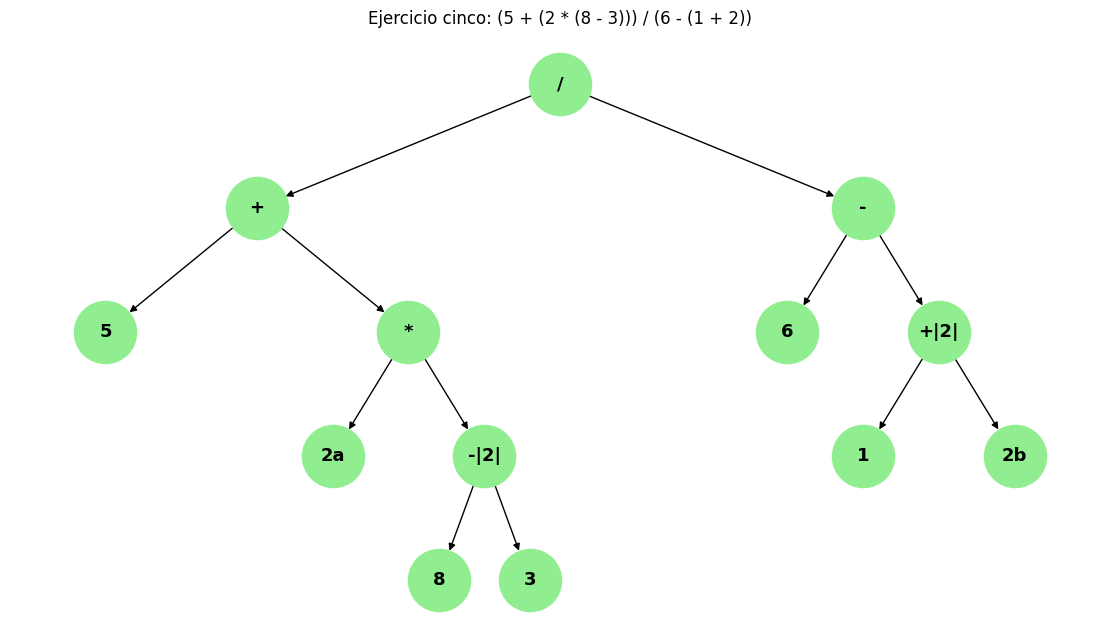

In [218]:
import matplotlib.pyplot as plt
import networkx as nx

# Creamos un grafo dirigido
G = nx.DiGraph()

# Definimos las conexiones entre nodos
edges = [
    ('/', '+'),
    ('/', '-'),
    ('+', '5'),
    ('+', '*'),
    ('*', '2a'),
    ('*', '-|2|'),
    ('-|2|', '8'),
    ('-|2|', '3'),
    ('-', '6'),
    ('-', '+|2|'),
    ('+|2|', '1'),
    ('+|2|', '2b')
]

# Agregar las conexiones
G.add_edges_from(edges)

# Definimos posiciones para visualizar el árbol de forma jerárquica
pos = {
    '/': (0, 3),
    '+': (-2, 2),
    '-': (2, 2),
    '5': (-3, 1),
    '*': (-1, 1),
    '2a': (-1.5, 0),
    '-|2|': (-0.5, 0),
    '8': (-0.8, -1),
    '3': (-0.2, -1),
    '6': (1.5, 1),
    '+|2|': (2.5, 1),
    '1': (2, 0),
    '2b': (3, 0)
}

# Dibujamos el árbol
plt.figure(figsize=(11, 6))
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=2000,
    font_size=13,
    font_weight='bold',
    arrows=True
)
plt.title("Ejercicio cinco: (5 + (2 * (8 - 3))) / (6 - (1 + 2))")
plt.axis('off')
plt.show()

### c. Evaluación de la Expresión

In [ ]:
def evaluar(nodo):
    if isinstance(nodo.valor, int):
        return nodo.valor

    operador = str(nodo.valor)[0]
    izq = evaluar(nodo.izq)
    der = evaluar(nodo.der)

    if operador == '+':
        return izq + der
    elif operador == '-':
        return izq - der
    elif operador == '*':
        return izq * der
    elif operador == '/':
        return izq / der

# Evaluamos la expresión
resultado = evaluar(arbol)
resultado

## Rúbrica de Evaluación (General - 100 puntos)


| Criterio                                                                                      | Puntaje Máximo |
|-----------------------------------------------------------------------------------------------|----------------|
| **1. Construcción correcta del árbol binario de expresión**                                  | **25 pts**     |
| - Jerarquía de operadores, operandos como hojas                                              |                |
|                                                                                               |                |
| **2. Implementación en Python con POO y recursividad**                                       | **25 pts**     |
| - Uso adecuado de clases y funciones recursivas                                              |                |
|                                                                                               |                |
| **3. Visualización clara con `networkx` y `matplotlib`**                                     | **20 pts**     |
| - Jerarquía y distribución clara de nodos                                                    |                |
|                                                                                               |                |
| **4. Evaluación correcta de la expresión aritmética**                                        | **20 pts**     |
| - Cálculo correcto del resultado                                                             |                |
|                                                                                               |                |
| **5. Claridad del código, organización y presentación del cuaderno**                         | **10 pts**     |
| - Comentarios, títulos y buena organización                                                  |                |
|                                                                                               |                |
| **Total**                                                                                     | **100 pts**    |
